In [1]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from PIL import Image

In [2]:
orig_image = Image.open('materialism 0.png')
width,height = orig_image.size
mode = orig_image.mode

print(width,height)
print(mode)

1700 2200
RGB


In [3]:
# Load all pixels from the image.
orig_pixel_map = orig_image.load()

# Create a new image matching the original image's color mode, and size.
#   Load all the pixels from this new image as well.
new_image = Image.new(mode, (width, height))
new_pixel_map = new_image.load()

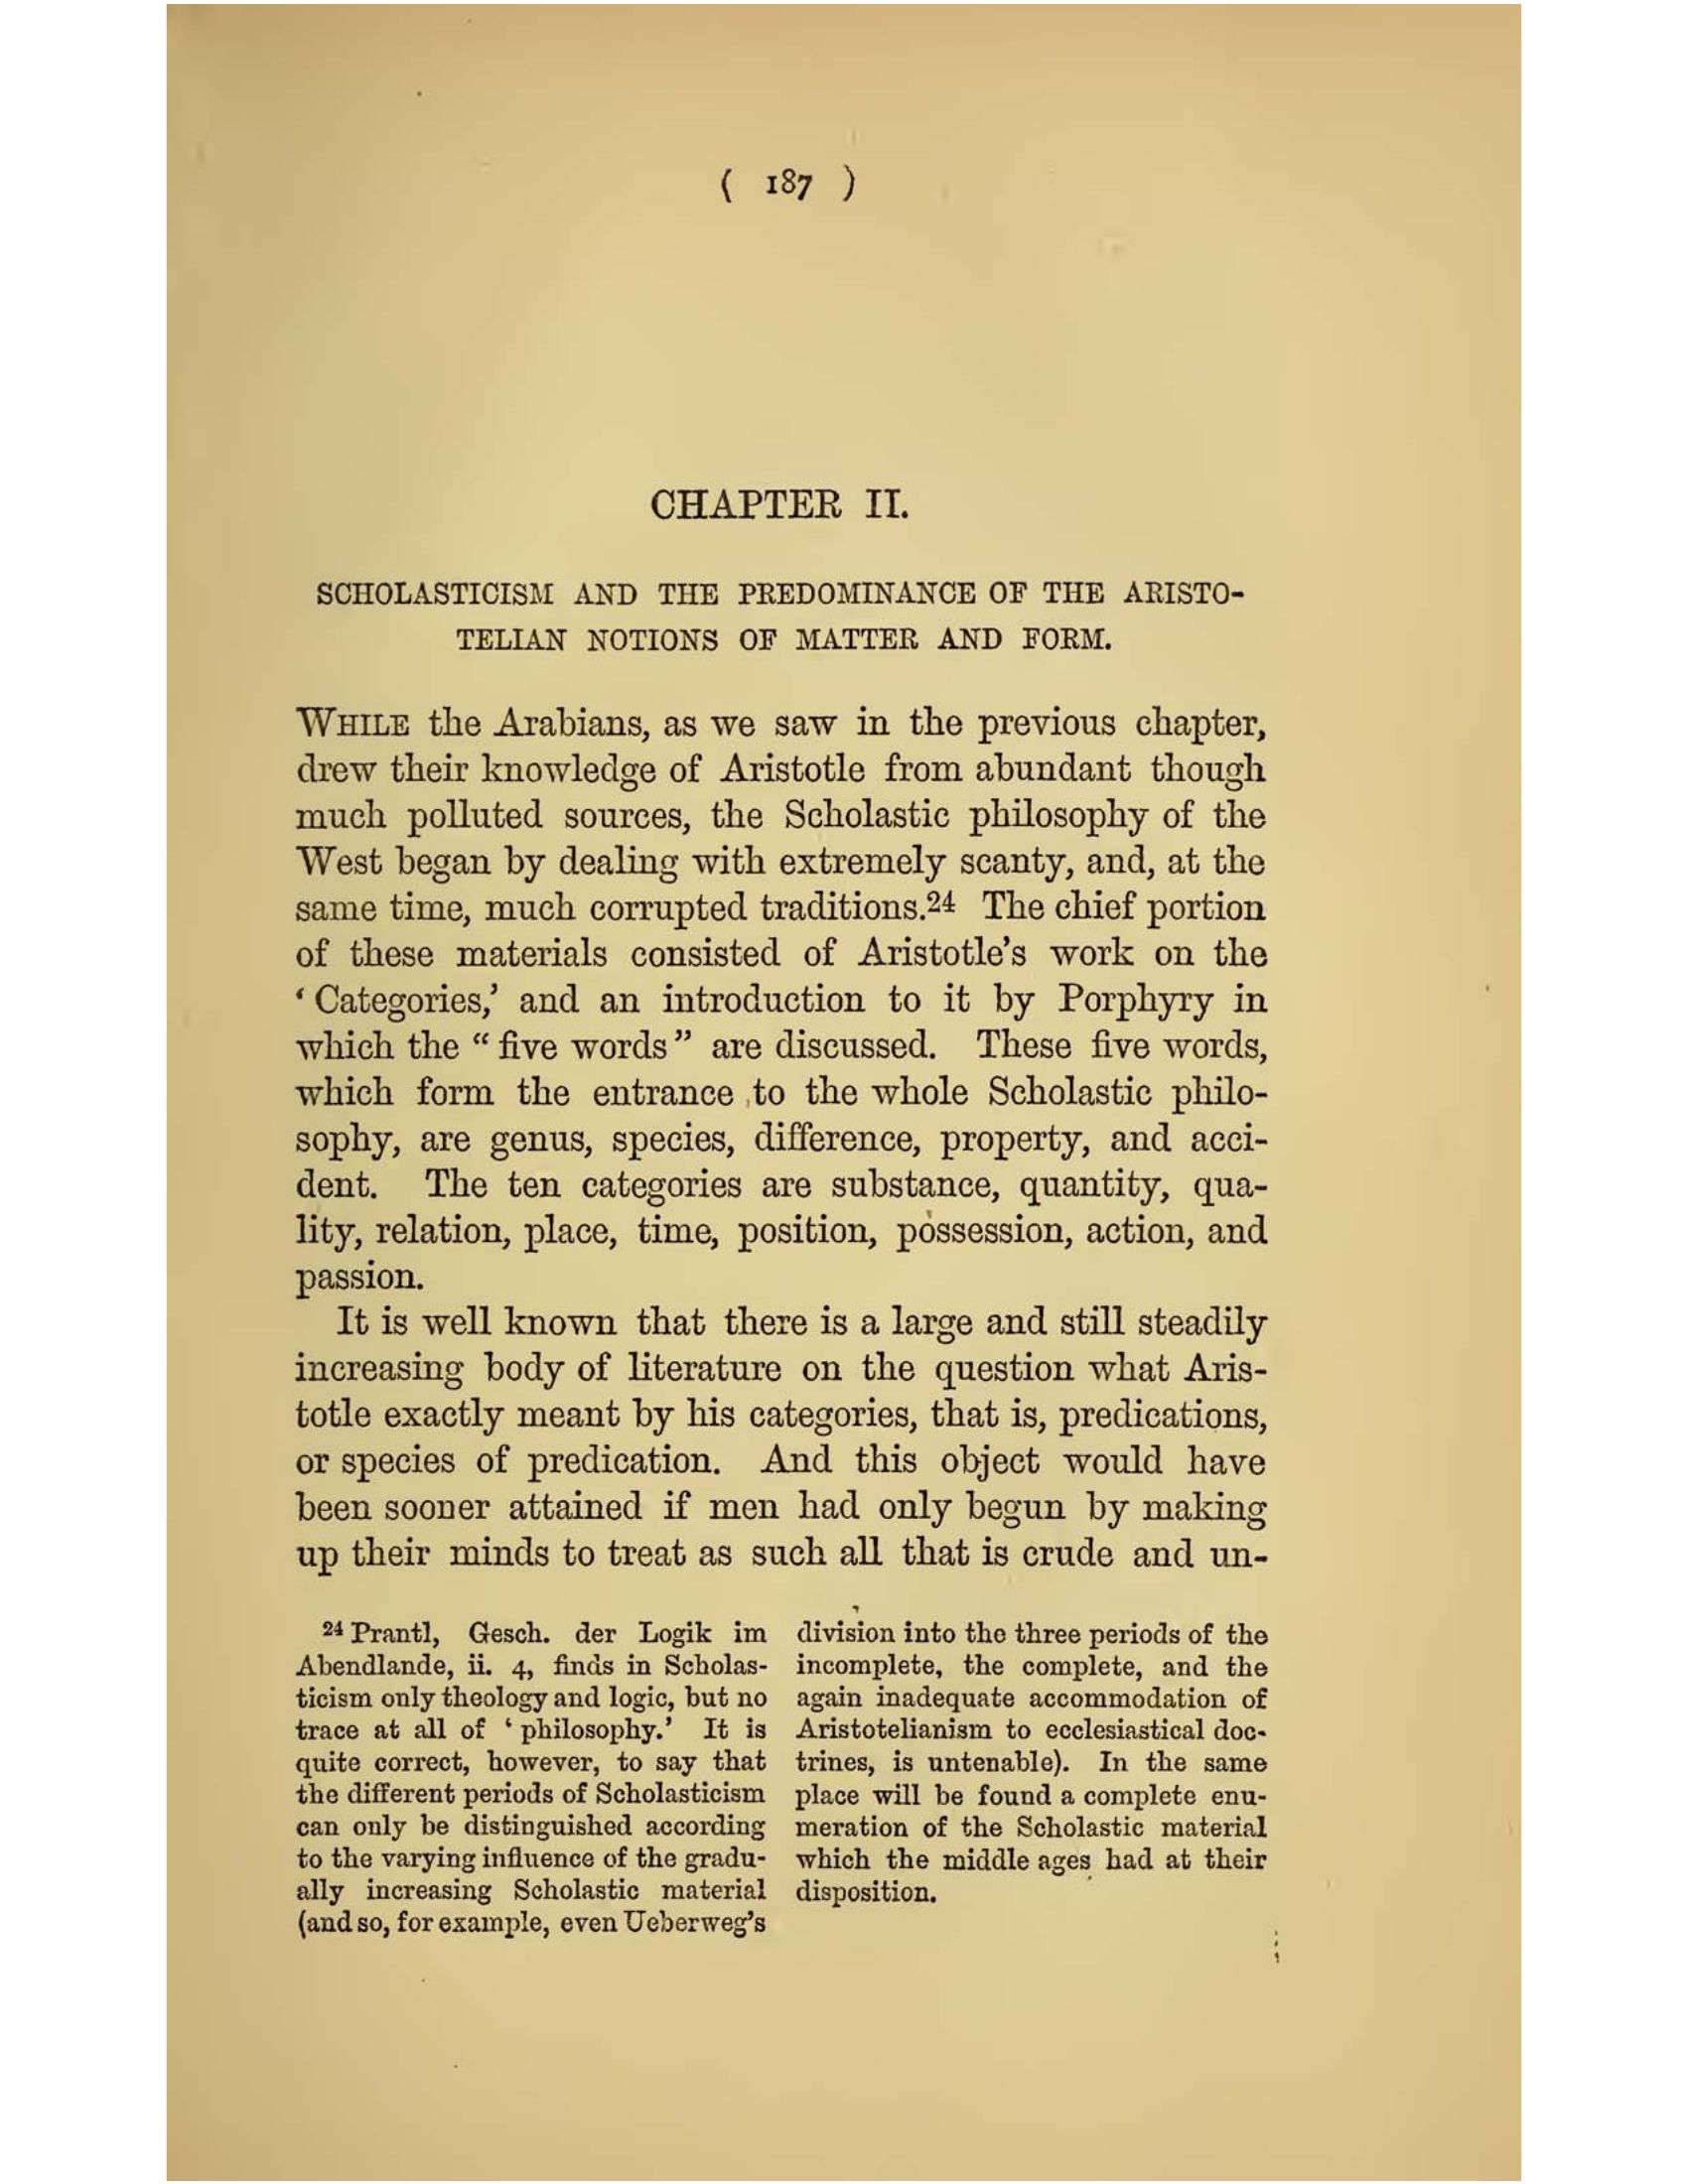

In [4]:
orig_image

In [5]:
@interact(threshold=widgets.IntSlider(min=0, max=500, step=1, value=50, continuous_update=True),
          darkness=widgets.IntSlider(min=.5, max=10, step=1, value=1, continuous_update=True))
def func(threshold, darkness):
    new_image = Image.new(mode, (width,height))
    new_pixel_map = new_image.load()

    for x in range(width):
        for y in range(height):
            r,g,b = orig_pixel_map[x,y]
            if sum((r,g,b)) > threshold:
                new_pixel_map[x,y] = (255,255,255)
            else:
                new_pixel_map[x,y] = (r*darkness,g*darkness,b*darkness)
                
    return new_image

interactive(children=(IntSlider(value=50, description='threshold', max=500), IntSlider(value=1, description='d…

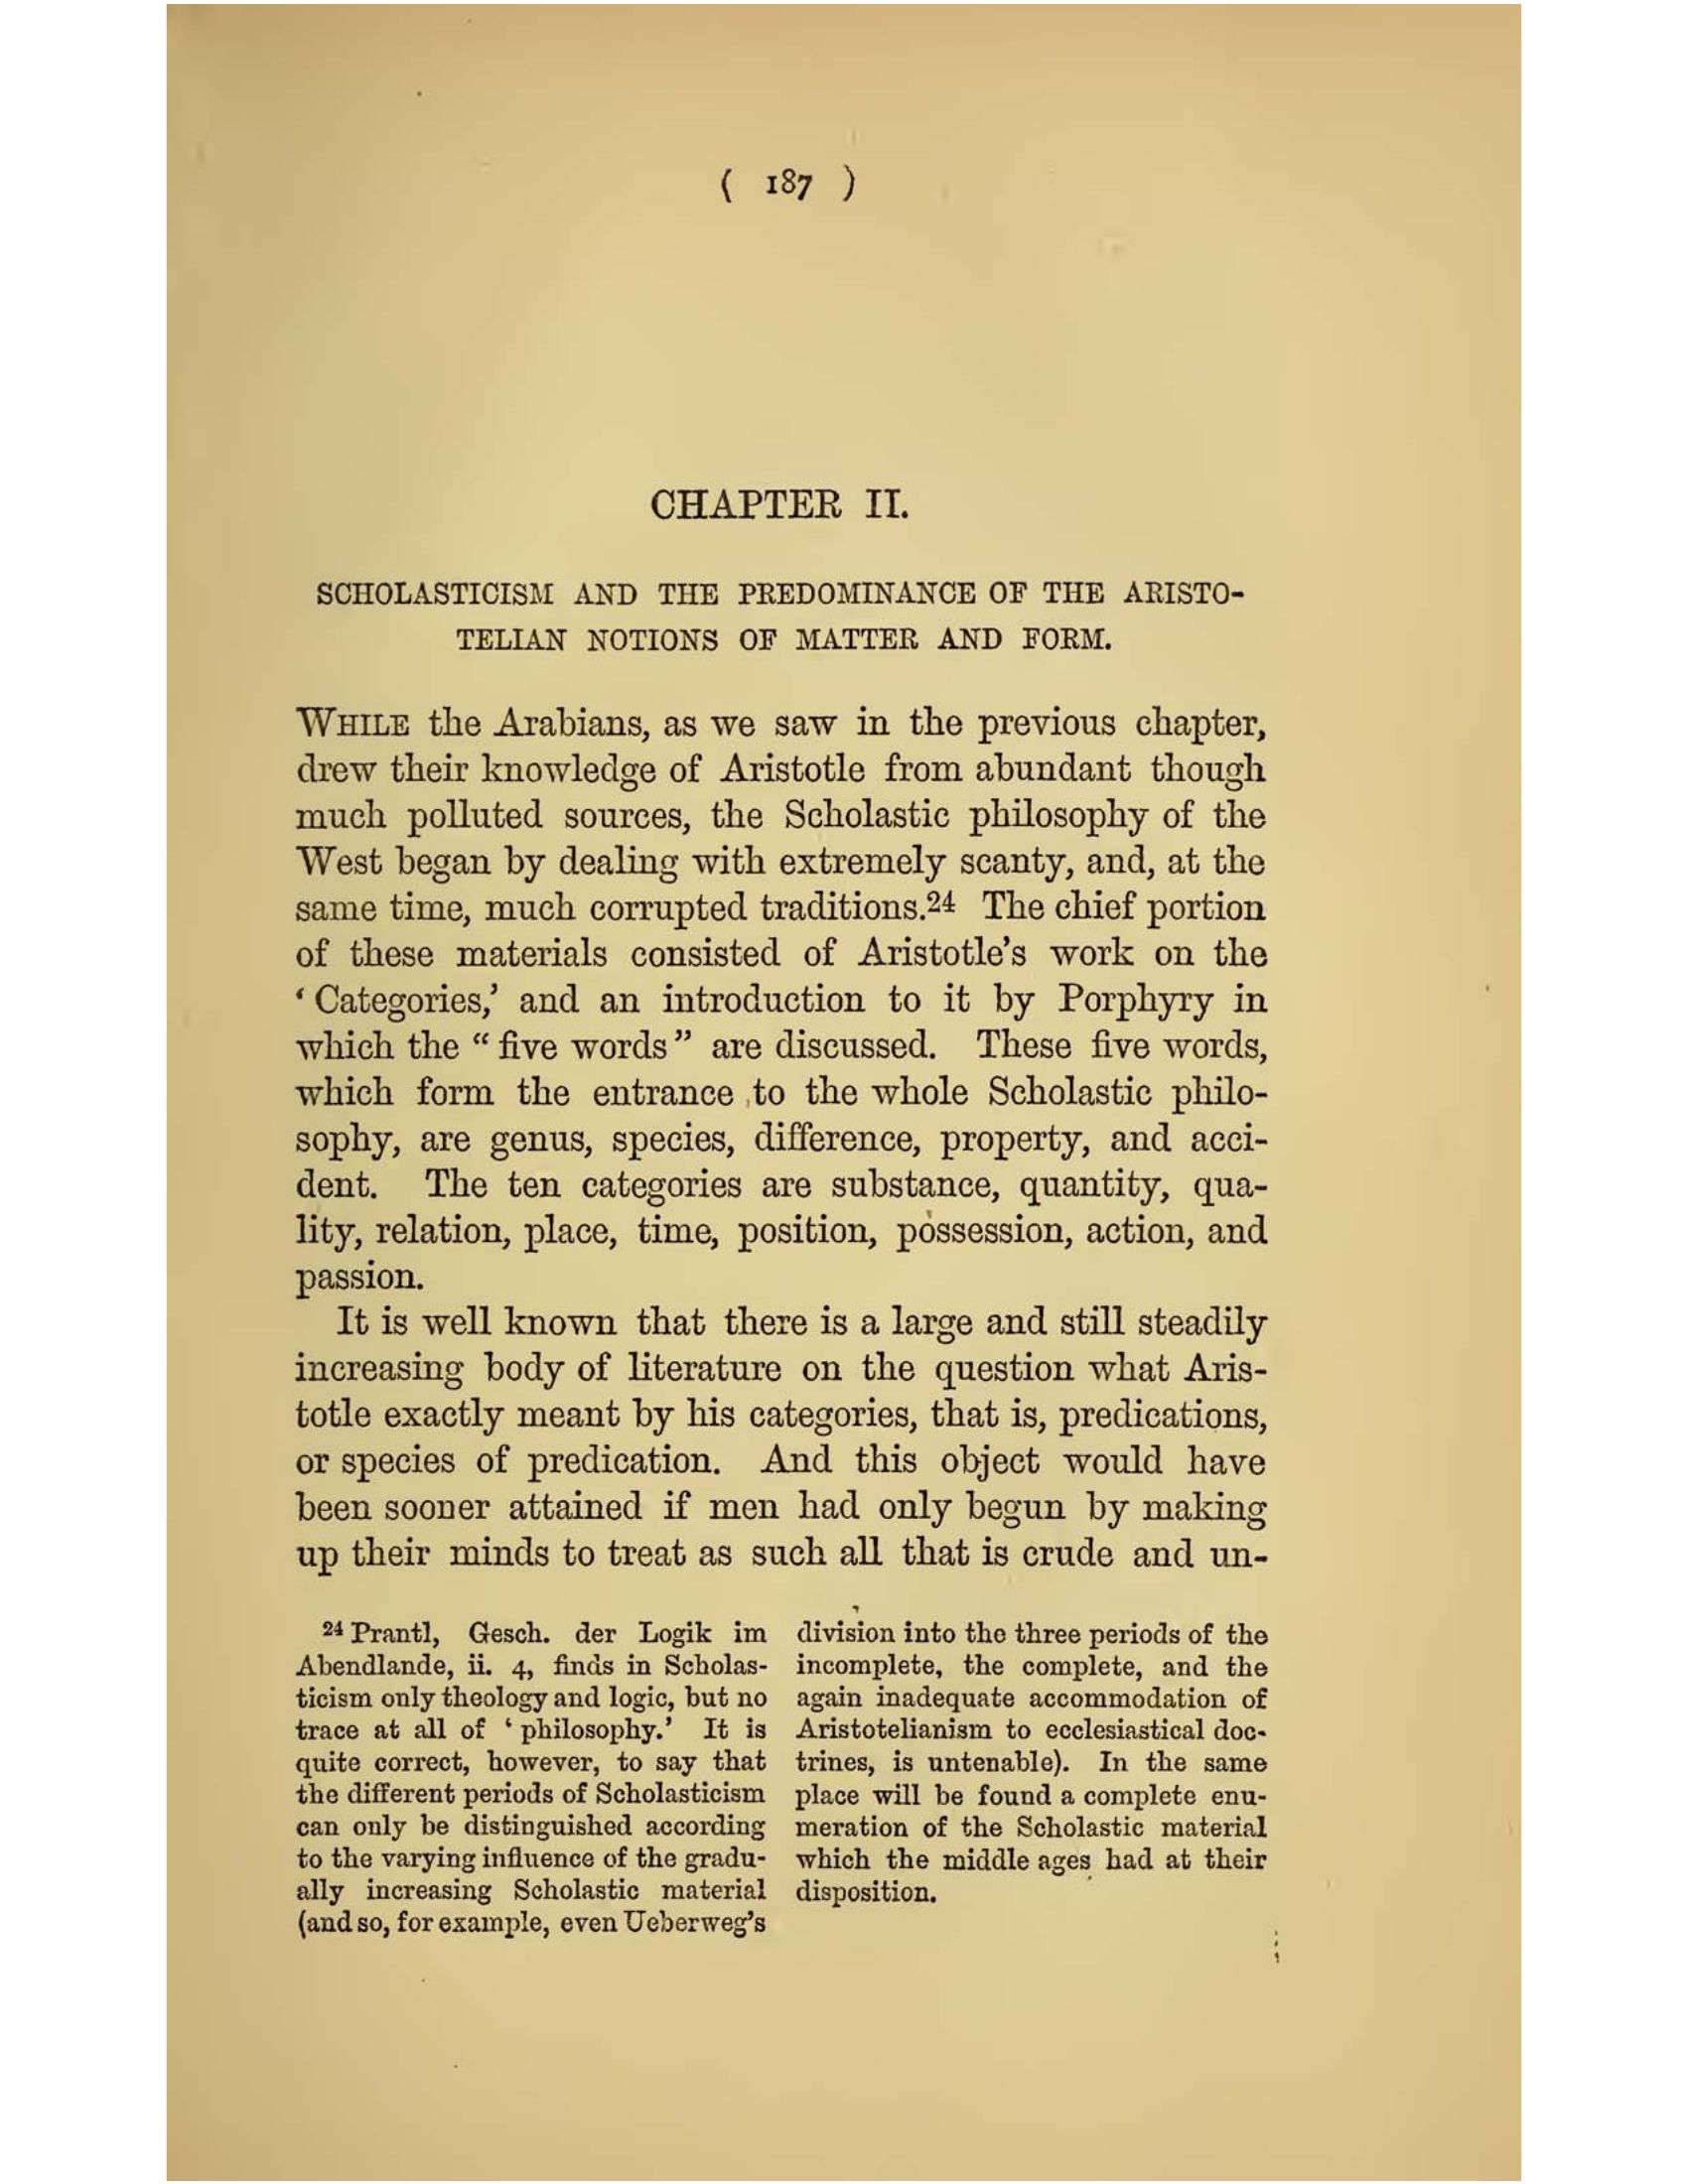

In [6]:
orig_image

In [7]:
orig_image.size

(1700, 2200)

In [8]:
orig_width, orig_height = orig_image.size

In [9]:
if orig_width > orig_height:
    max_size = orig_width
else:
    max_size = orig_height

In [10]:
max_size

2200

In [11]:
@interact(left=widgets.IntSlider(min=0, max=2200, step=1, value=1, continuous_update=True),
          top=widgets.IntSlider(min=0, max=2200, step=1, value=1, continuous_update=True),
          right=widgets.IntSlider(min=0, max=2200, step=1, value=1, continuous_update=True),
          bottom=widgets.IntSlider(min=0, max=2200, step=1, value=1, continuous_update=True))

def crop(left,top,right,bottom):
    left = 180
    top = 7
    right = 1400
    bottom = 2100
    cropped_image = orig_image.crop((left,top,right,bottom))
    
    return cropped_image


interactive(children=(IntSlider(value=1, description='left', max=2200), IntSlider(value=1, description='top', …

In [13]:
@interact(left=widgets.IntSlider(min=0, max=2200, step=1, value=1, continuous_update=True),
          top=widgets.IntSlider(min=0, max=2200, step=1, value=1, continuous_update=True),
          right=widgets.IntSlider(min=0, max=2200, step=1, value=1, continuous_update=True),
          bottom=widgets.IntSlider(min=0, max=2200, step=1, value=1, continuous_update=True))

def crop(left,top,right,bottom):
    left = 0
    top = 0
    right = max_size
    bottom = max_size
    cropped_image = orig_image.crop((left,top,right,bottom))
        
    return cropped_image

interactive(children=(IntSlider(value=1, description='left', max=2200), IntSlider(value=1, description='top', …